In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Problem Definition
"""
E-news Express aims to determine if a newly designed landing page is more effective than the existing one in increasing user engagement and conversions. The analysis focuses on the following questions:

1. Do users spend more time on the new landing page than on the existing one?
2. Is the conversion rate higher for the new page?
3. Does the conversion status depend on the preferred language?
4. Is the time spent on the new page consistent across different languages?
"""

'\nE-news Express aims to determine if a newly designed landing page is more effective than the existing one in increasing user engagement and conversions. The analysis focuses on the following questions:\n\n1. Do users spend more time on the new landing page than on the existing one?\n2. Is the conversion rate higher for the new page?\n3. Does the conversion status depend on the preferred language?\n4. Is the time spent on the new page consistent across different languages?\n'

In [4]:
#Load Data

df = pd.read_csv('abtest.csv')

In [6]:
#Data BackGround and Contents
"""
Data Background and Contents
The dataset includes information about the interaction of users with the landing pages, and it comprises the following variables:

user_id: A unique identifier for each user visiting the website.\n

group: Indicates whether the user belongs to the control group (existing landing page) or the treatment group (new landing page).\n

landing_page: Specifies whether the landing page is new or old.\n

time_spent_on_the_page: The time (in minutes) spent by the user on the landing page.\n

converted: A binary variable indicating whether the user subscribed to the news portal (1 for converted, 0 for not converted).\n

language_preferred: The language selected by the user to view the landing page.\n
"""

'\nData Background and Contents\nThe dataset includes information about the interaction of users with the landing pages, and it comprises the following variables:\n\nuser_id: A unique identifier for each user visiting the website.\n\n\ngroup: Indicates whether the user belongs to the control group (existing landing page) or the treatment group (new landing page).\n\n\nlanding_page: Specifies whether the landing page is new or old.\n\n\ntime_spent_on_the_page: The time (in minutes) spent by the user on the landing page.\n\n\nconverted: A binary variable indicating whether the user subscribed to the news portal (1 for converted, 0 for not converted).\n\n\nlanguage_preferred: The language selected by the user to view the landing page.\n\n'

In [7]:
# Display the first few rows of the dataset
print(df.head())

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  


In [ ]:
"""Do the users spend more time on the new landing page than the old landing page?
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value"""

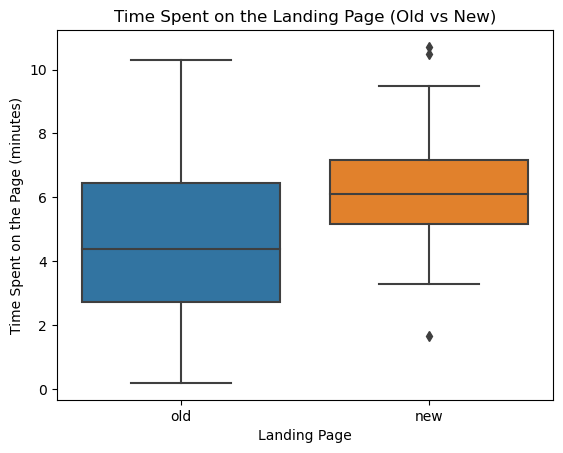

In [8]:
# Visual analysis: Boxplot for time spent on the landing page by group
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.title("Time Spent on the Landing Page (Old vs New)")
plt.xlabel("Landing Page")
plt.ylabel("Time Spent on the Page (minutes)")
plt.show()


In [9]:

# Separate the time spent data into two groups to check user spend of old vs new page time
new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Perform a one-tailed t-test to test and check statistic and p value
t_stat, p_value = stats.ttest_ind(new_page_time, old_page_time, alternative='greater')

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 3.7867702694199856
p-value: 0.0001316123528095005


In [11]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Users spend more time on the new landing page than on the old one.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say that users spend more time on the new landing page.")


Reject the null hypothesis: Users spend more time on the new landing page than on the old one.


In [12]:
"""Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value"""

'Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?\n- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value'

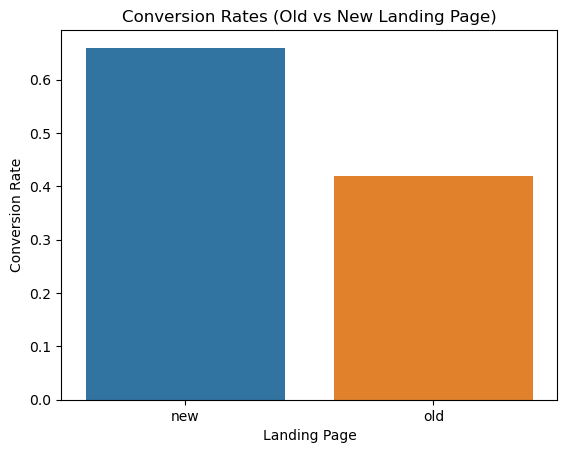

z-statistic: 2.4077170617153842
p-value: 0.008026308204056278
Reject the null hypothesis: The conversion rate for the new landing page is greater than the conversion rate for the old landing page.


In [14]:
# Convert "yes"/"no" to 1/0 in the 'converted' column
df['converted'] = df['converted'].map({'yes': 1, 'no': 0})

# Visual analysis: Bar plot for conversion rates by landing page
conversion_rates = df.groupby('landing_page')['converted'].mean().reset_index()

sns.barplot(x='landing_page', y='converted', data=conversion_rates)
plt.title("Conversion Rates (Old vs New Landing Page)")
plt.xlabel("Landing Page")
plt.ylabel("Conversion Rate")
plt.show()

# Count the number of conversions and total users in each group
new_conversions = df[df['landing_page'] == 'new']['converted'].sum()
new_total = df[df['landing_page'] == 'new']['converted'].count()
old_conversions = df[df['landing_page'] == 'old']['converted'].sum()
old_total = df[df['landing_page'] == 'old']['converted'].count()

# Perform a one-tailed z-test for proportions
count = np.array([new_conversions, old_conversions])
nobs = np.array([new_total, old_total])

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"z-statistic: {z_stat}")
print(f"p-value: {p_value}")

# Inference based on the p-value
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The conversion rate for the new landing page is greater than the conversion rate for the old landing page.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say that the conversion rate for the new landing page is greater.")


In [15]:
"""Does the converted status depend on the preferred language?
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value"""

'Does the converted status depend on the preferred language?\n- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value'

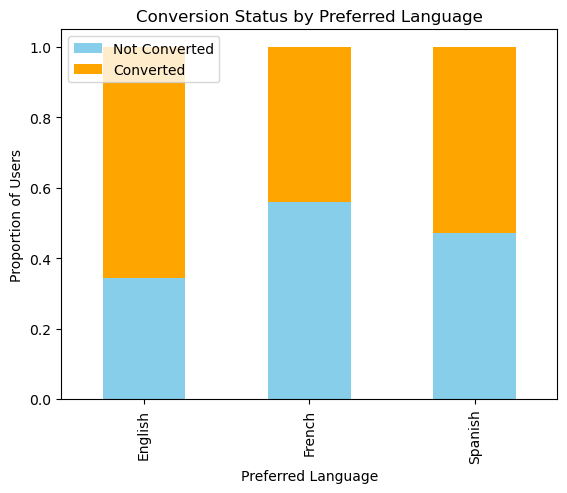

In [16]:
conversion_by_language = pd.crosstab(df['language_preferred'], df['converted'], normalize='index')

conversion_by_language.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Conversion Status by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Proportion of Users")
plt.legend(['Not Converted', 'Converted'], loc='upper left')
plt.show()

In [17]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")

Chi-Square Statistic: 3.0930306905370832
p-value: 0.2129888748754345


In [18]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The conversion status depends on the preferred language.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say that the conversion status depends on the preferred language.")


Fail to reject the null hypothesis: There is not enough evidence to say that the conversion status depends on the preferred language.


In [19]:
"""Is the mean time spent on the new page same for the different language users?
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value"""

'Is the mean time spent on the new page same for the different language users?\n- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value'

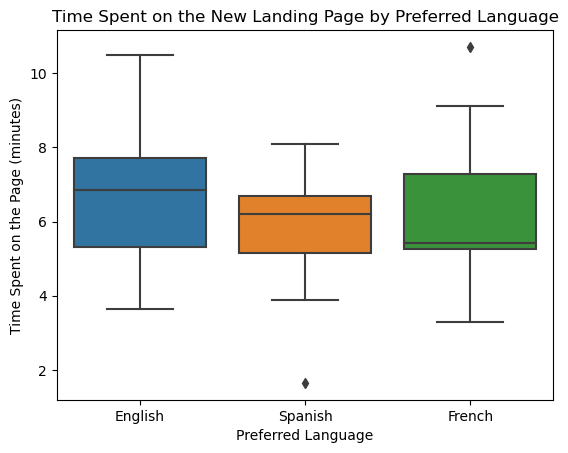

In [20]:
new_page_data = df[df['landing_page'] == 'new']

sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data)
plt.title("Time Spent on the New Landing Page by Preferred Language")
plt.xlabel("Preferred Language")
plt.ylabel("Time Spent on the Page (minutes)")
plt.show()

In [21]:
languages = new_page_data['language_preferred'].unique()

grouped_data = [new_page_data[new_page_data['language_preferred'] == lang]['time_spent_on_the_page'] for lang in languages]

#ANOVA test
f_stat, p_value = stats.f_oneway(*grouped_data)

print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

F-statistic: 0.854399277000682
p-value: 0.43204138694325955


In [22]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The mean time spent on the new landing page is different for at least one pair of language groups.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say that the mean time spent on the new landing page differs among language groups.")


Fail to reject the null hypothesis: There is not enough evidence to say that the mean time spent on the new landing page differs among language groups.


In [29]:
# Univariate Analysis
def univariate_analysis(df):
    print("Univariate Analysis")
    print("Summary Statistics:\n", df.describe())
    print("\nUnique user IDs:", df['user_id'].nunique())
    print("\nDistribution of Groups:\n", df['group'].value_counts())
    print("\nDistribution of Landing Pages:\n", df['landing_page'].value_counts())
    print("\nDistribution of Time Spent on Page:\n", df['time_spent_on_the_page'].describe())
    print("\nConversion Rate:\n", df['converted'].value_counts(normalize=True))
    print("\nPreferred Languages:\n", df['language_preferred'].value_counts())

    sns.histplot(df['time_spent_on_the_page'], kde=True)
    plt.title("Distribution of Time Spent on the Page")
    plt.show()

In [30]:
# Bivariate Analysis
def bivariate_analysis(df):
    print("Bivariate Analysis")

    sns.boxplot(x='group', y='time_spent_on_the_page', data=df)
    plt.title("Time Spent on Page by Group")
    plt.show()

    conversion_rate = df.groupby('group')['converted'].mean()
    print("\nConversion Rate by Group:\n", conversion_rate)


    conversion_by_language = pd.crosstab(df['language_preferred'], df['converted'], normalize='index')
    print("\nConversion Rate by Preferred Language:\n", conversion_by_language)

    sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df[df['landing_page'] == 'new'])
    plt.title("Time Spent on New Page by Language")
    plt.show()


In [32]:
# Statistical Testing
def statistical_tests(df):
    print("Statistical Tests")
    
    control_time = df[df['group'] == 'control']['time_spent_on_the_page']
    treatment_time = df[df['group'] == 'treatment']['time_spent_on_the_page']
    t_stat, p_value = stats.ttest_ind(control_time, treatment_time)
    print(f"Time Spent on Page: t-statistic={t_stat}, p-value={p_value}")
    
    control_conversion = df[df['group'] == 'control']['converted']
    treatment_conversion = df[df['group'] == 'treatment']['converted']
    chi2_stat, p_value, _, _ = stats.chi2_contingency(pd.crosstab(df['group'], df['converted']))
    print(f"Conversion Rate: chi2-statistic={chi2_stat}, p-value={p_value}")
    
    chi2_stat, p_value, _, _ = stats.chi2_contingency(pd.crosstab(df['language_preferred'], df['converted']))
    print(f"Conversion and Language: chi2-statistic={chi2_stat}, p-value={p_value}")

    new_page_times = df[df['landing_page'] == 'new']
    f_stat, p_value = stats.f_oneway(
        new_page_times[new_page_times['language_preferred'] == 'English']['time_spent_on_the_page'],
        new_page_times[new_page_times['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
        new_page_times[new_page_times['language_preferred'] == 'French']['time_spent_on_the_page']
    )
    print(f"Time Spent on New Page Across Languages: f-statistic={f_stat}, p-value={p_value}")


Univariate Analysis
Summary Statistics:
              user_id  time_spent_on_the_page   converted
count     100.000000              100.000000  100.000000
mean   546517.000000                5.377800    0.540000
std        52.295779                2.378166    0.500908
min    546443.000000                0.190000    0.000000
25%    546467.750000                3.880000    0.000000
50%    546492.500000                5.415000    1.000000
75%    546567.250000                7.022500    1.000000
max    546592.000000               10.710000    1.000000

Unique user IDs: 100

Distribution of Groups:
 control      50
treatment    50
Name: group, dtype: int64

Distribution of Landing Pages:
 old    50
new    50
Name: landing_page, dtype: int64

Distribution of Time Spent on Page:
 count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

Conversion

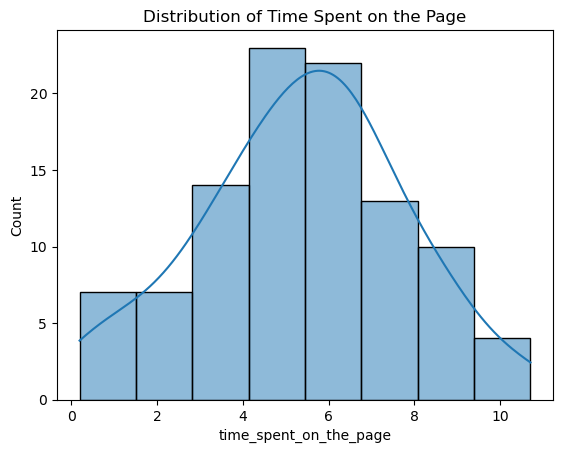

In [33]:
# Execute EDA and Statistical Tests
univariate_analysis(df)

Bivariate Analysis


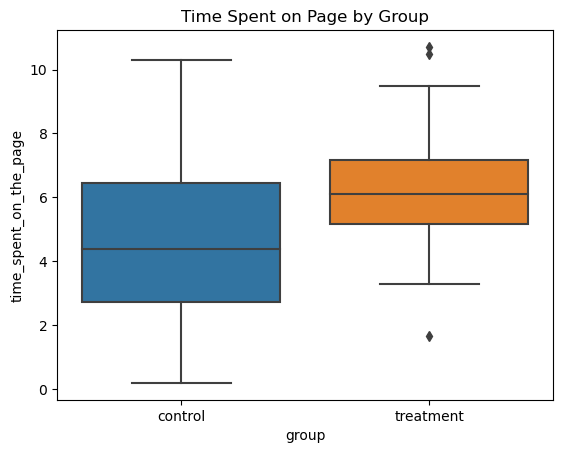


Conversion Rate by Group:
 group
control      0.42
treatment    0.66
Name: converted, dtype: float64

Conversion Rate by Preferred Language:
 converted                  0         1
language_preferred                    
English             0.343750  0.656250
French              0.558824  0.441176
Spanish             0.470588  0.529412


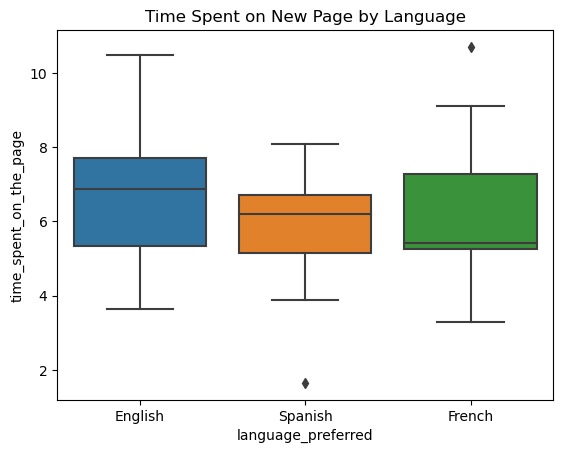

In [34]:
bivariate_analysis(df)

In [35]:
statistical_tests(df)

Statistical Tests
Time Spent on Page: t-statistic=-3.7867702694199856, p-value=0.000263224705619001
Conversion Rate: chi2-statistic=4.871175523349437, p-value=0.02730889175492232
Conversion and Language: chi2-statistic=3.0930306905370832, p-value=0.2129888748754345
Time Spent on New Page Across Languages: f-statistic=0.854399277000682, p-value=0.43204138694325955


In [36]:
"""Illustrate the insights based on EDA
Key meaningful observations on individual variables and the relationship between variables"""

'Illustrate the insights based on EDA\nKey meaningful observations on individual variables and the relationship between variables'

In [37]:
#Individual Variables

#time_spent_on_the_page

#Observation: The distribution of time spent on the page can show whether users are engaged and if there are differences between the old and new landing pages.

#Insights:

#Central Tendency: Compare the average time spent on the new and old landing pages. The new page may have a higher mean time, indicating better user engagement.

#Variability: Check for variance or spread in time spent. A more consistent time spent might indicate a more uniformly engaging page.

#Visuals: Boxplots or histograms can reveal the distribution and potential outliers.

In [38]:
#Relationships Between Variables

#time_spent_on_the_page and landing_page

#Observation: Compare the time spent on the new versus old landing page.

#Insights:

#Mean Time Comparison: The new landing page may have a higher average time spent.

#Visuals: Boxplots or violin plots can effectively compare the distribution of time spent on each landing page.

In [23]:
"""Conclusion and Business Recommendation"""

'Conclusion and Business Recommendation'

In [25]:
#Based on the statistical analyses conducted, we can summarize the findings as follows:

#Time Spent on the New vs. Old Landing Page:

#Result: Users spend more time on the new landing page compared to the old landing page.
    
#Statistical Evidence: The null hypothesis was rejected, indicating a significant difference in the mean time spent on the two pages.

#Implication: The new landing page appears to be more engaging, keeping users on the site for a longer period.

In [26]:
"Business Recommendations"

'Business Recommendations'

In [39]:
#Implement the New Landing Page

#Localized Content Optimization

#Focus on User Retention Strategies

#Monitor and Iterate Continuous monitoring of user behavior on the new landing page is essential. A/B testing should be an ongoing process, with new features or content updates tested to ensure they contribute positively to user engagement and conversion rates.